
# <div align="center">Do your action really take the effect?</div>
## <div align="center"> Crash Course in Causality
#### <div align="right">INFO 7390 Advances Data Sci/Architecture SEC 03 Spring 2025</div>
#### <div align="right">Yifan Yuan</div>
Have you ever asked yourself, "If I go to bed earlier, will I be less late today?" - This is a **causal question**.
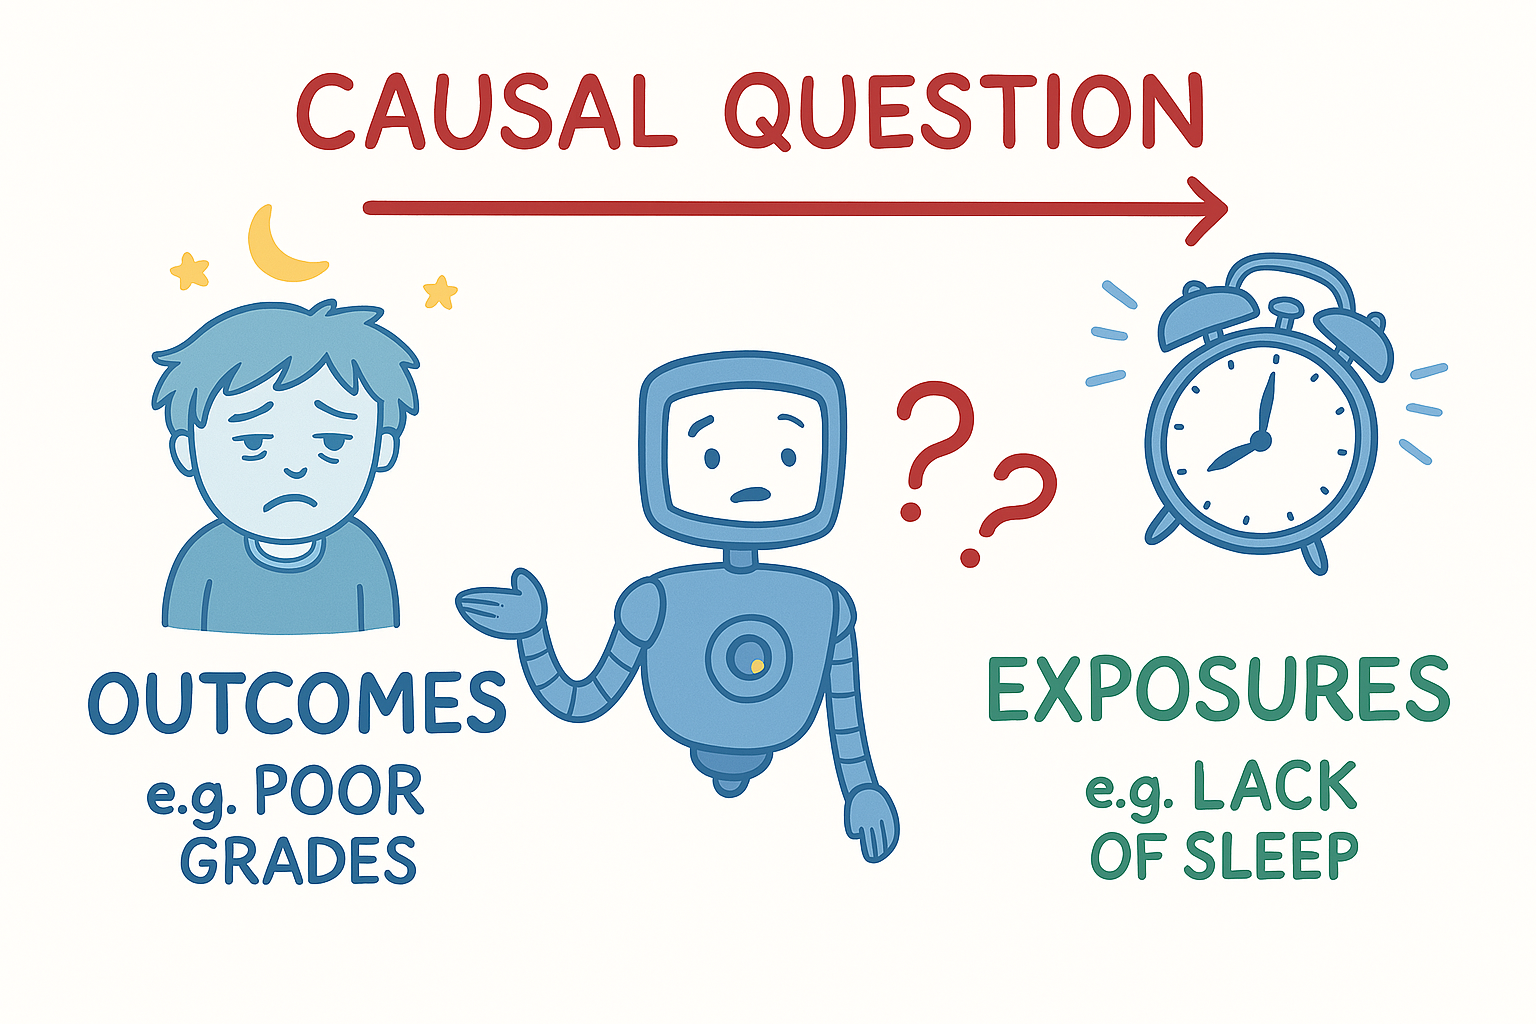
Many of our daily decisions are based on the assumption that "if I do this, will I do that?" This way of thinking is the basis of causal inference.

But the problem is that just seeing two things happen together does not mean that there is a causal relationship between them.

So how should we confirm that there is a causal relationship between them?
Let's first dertermine what is the problem that we meet.

Now we are working on a paired binary outcomes like this–success/failure, yes/no, correct/incorrect–it is easy to fall into the trap of simple accuracy comparisons




##  McNemar’s Test
Now we are introduction to our first Causality test
### What is McNemar’s Test
it is a nonparametric statistical test method for paired binary data, which is often used to compare whether the difference between two related samples in two categories is significant.

let's have a simple example to show it

In [1]:
import pandas as pd

data = pd.DataFrame({
    "After Vote = Yes": [30, 25],
    "After Vote = No": [10, 35]
}, index=["Before Vote = Yes", "Before Vote = No"])

display(data)

After Vote = Yes  After Vote = No
Before Vote = Yes                30               10
Before Vote = No                 25               35

In this simple example we assume we come out a policy that come during the voting How we messure the effect of this police?

In [2]:
## Extract values
a = 30  # Before=Yes, After=Yes
b = 10  # Before=Yes, After=No
c = 25  # Before=No, After=Yes
d = 35  # Before=No, After=No

## McNemar Test Statistic
from scipy.stats import chi2

statistic = (b - c)**2 / (b + c)
p_value = 1 - chi2.cdf(statistic, df=1)

print(f"McNemar's Chi-Square Statistic: {statistic:.2f}")
print(f"P-value: {p_value:.4f}")


McNemar's Chi-Square Statistic: 6.43
P-value: 0.0112


We focus on the off-diagonal values (b=10 and c=25), which represent changes between conditions.
McNemar's statistic is:

    χ² = (b - c)^2 / (b + c)
       = (10 - 25)^2 / (10 + 25)
       = 225 / 35 ≈ 6.43

The corresponding p-value is below 0.05, indicating a statistically significant change in voting behavior,
possibly due to the policy intervention.

## Rubin Causal Model

Now that we have a basic understanding of causal inference, let's delve a bit deeper into the mathematical framework behind it.

### Potential Outcomes

To begin, let's define some key concepts.

For each **unit** (e.g., a person, a city, or a company), we imagine the possible outcomes under different treatment conditions:

- **𝑌(1)**: The outcome when the unit **receives** the treatment (treatment outcome)  
- **𝑌(0)**: The outcome when the unit **does not receive** the treatment (control outcome)

These are called the **potential outcomes** for that unit.

### Counterfactuals

A **counterfactual** is a potential outcome that we **cannot observe** — essentially, it answers the question:  
*What would have happened if reality were different?*

- If someone **received treatment**, we observe **𝑌(1)** and **𝑌(0)** becomes the counterfactual.  
- If someone **did not receive treatment**, we observe **𝑌(0)** and **𝑌(1)** becomes the counterfactual.

### Causal Effect

The **causal effect** of a treatment on a unit is defined as the **difference** between the two potential outcomes:

Causal Effect = Y(1) - Y(0)
### Fundamental Problem of Causal Inference
We cannot observe the outcomes for the same unit in both treatment conditions at the same point in time.
we could never know someone **did not receive treatment**, after we already did the treatment to it:

Example

- Y(1)：Income after finished university
- Y(0)：Income don't finish university

Now someone has gone to college and earns $80,000 (observed result). What would he have earned if he had not gone to college? We can never know, it is a counterfactual. But we can use a group of people who did not go to college but have similar characteristics to estimate his Y(0)



## Directed acyclic graph (DAG)

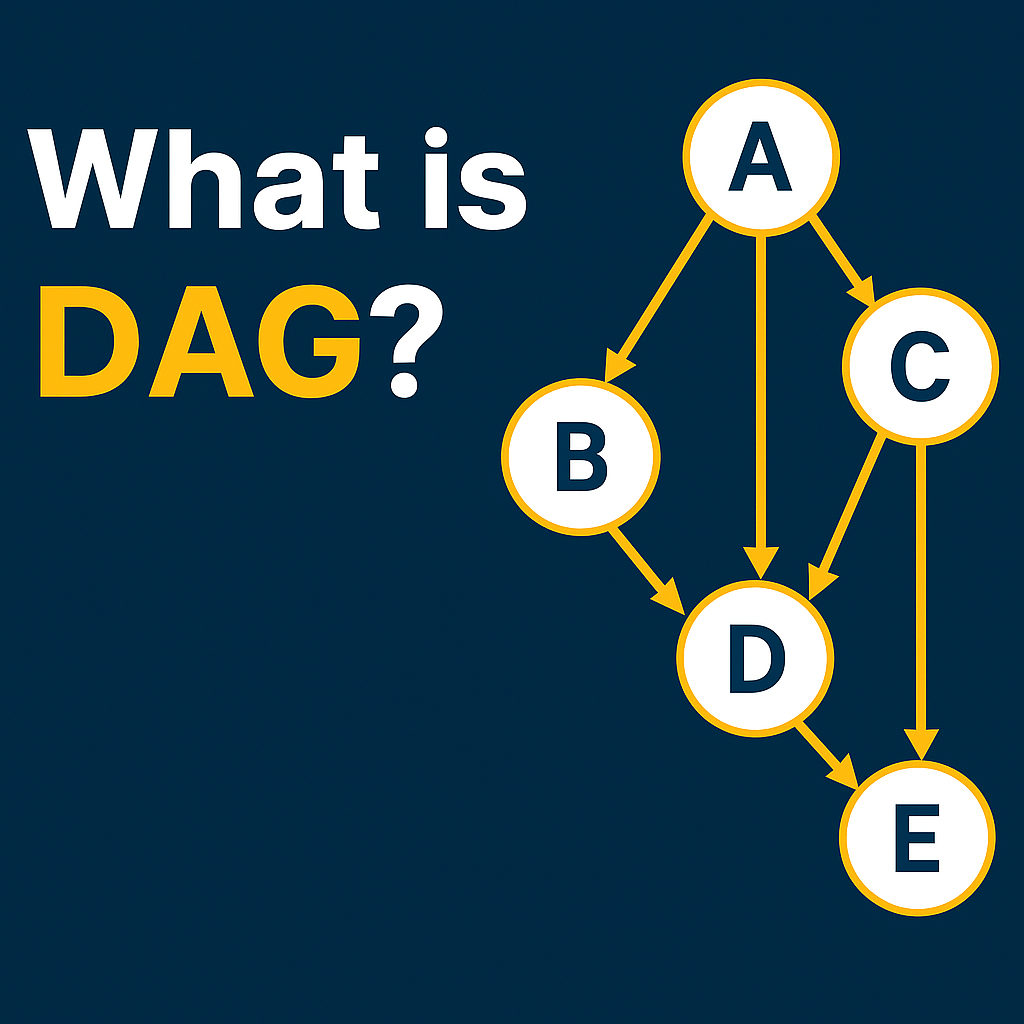

Now we have already know about how the Causal Model are talking about, lets move to a more complicate problem what about there are more Causual relationship?

### What is DAG
DAG is Directed Acyclic Graph which is a graph used to represent the causal relationship between variables. Each node is a variable and each arrow represents a causal effect.
It is a "map" in causal inference, helping us identify which variables are mixed, collided, and need to be controlled.


To further talk more about the causal relationship let's first talke about some concepts
### Confounder
A varible that affects both the treatment (T) and the outcome (Y), thus confounding our estimate of the causal effect.
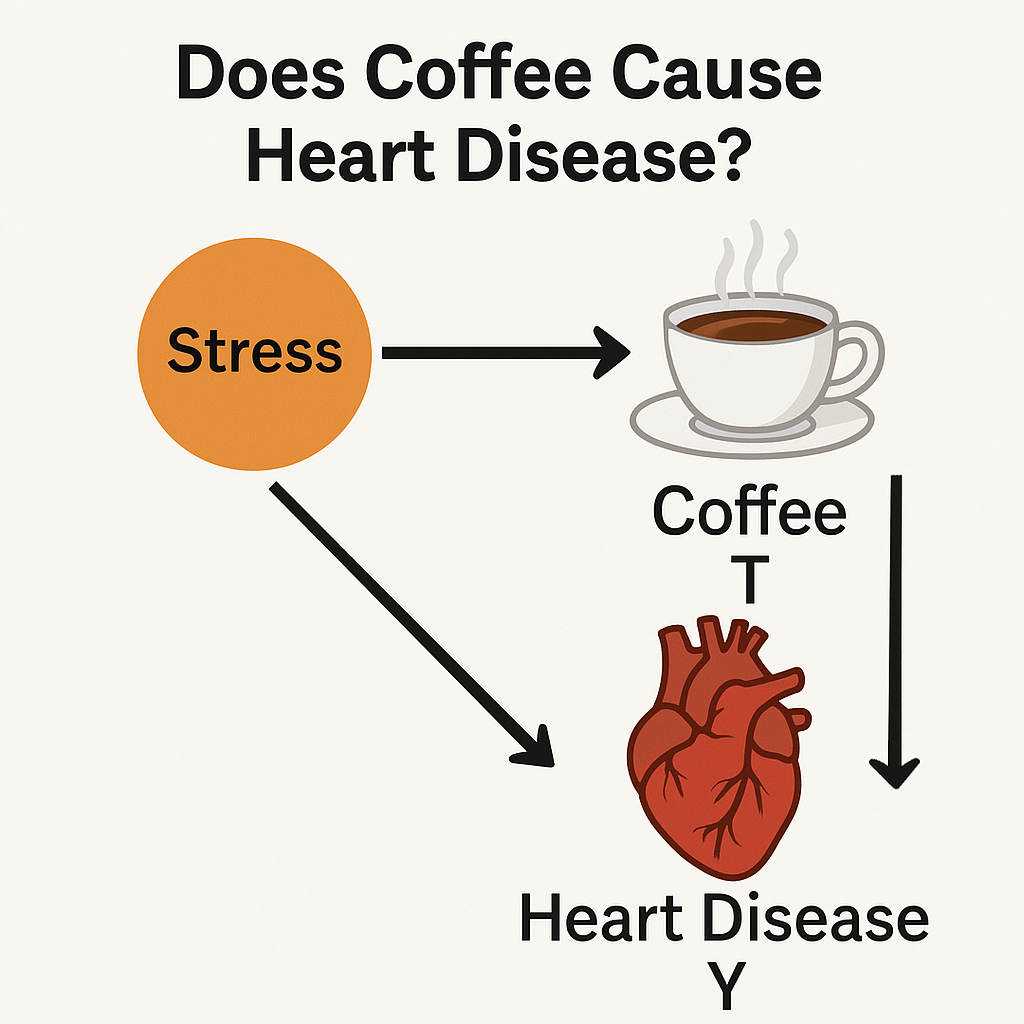

Example

Suppose we're investigating the question:

"Does drinking coffee (T) cause heart disease (Y)?"

You observe that:
People who drink coffee tend to have a higher rate of heart disease.
Can we conclude that "coffee causes heart disease"?

Not necessarily

Stress (C) could be influencing both:

- People under high stress are more likely to drink coffee<br>
C→T→Y

- People under high stress are more likely to develop heart disease<br>
C→Y

- we could foundout <br>
T←C→Y

In this case, stress is a confounding variable — it creates a spurious association between coffee and heart disease. That means the observed relationship might not be causal at all.


### Collider

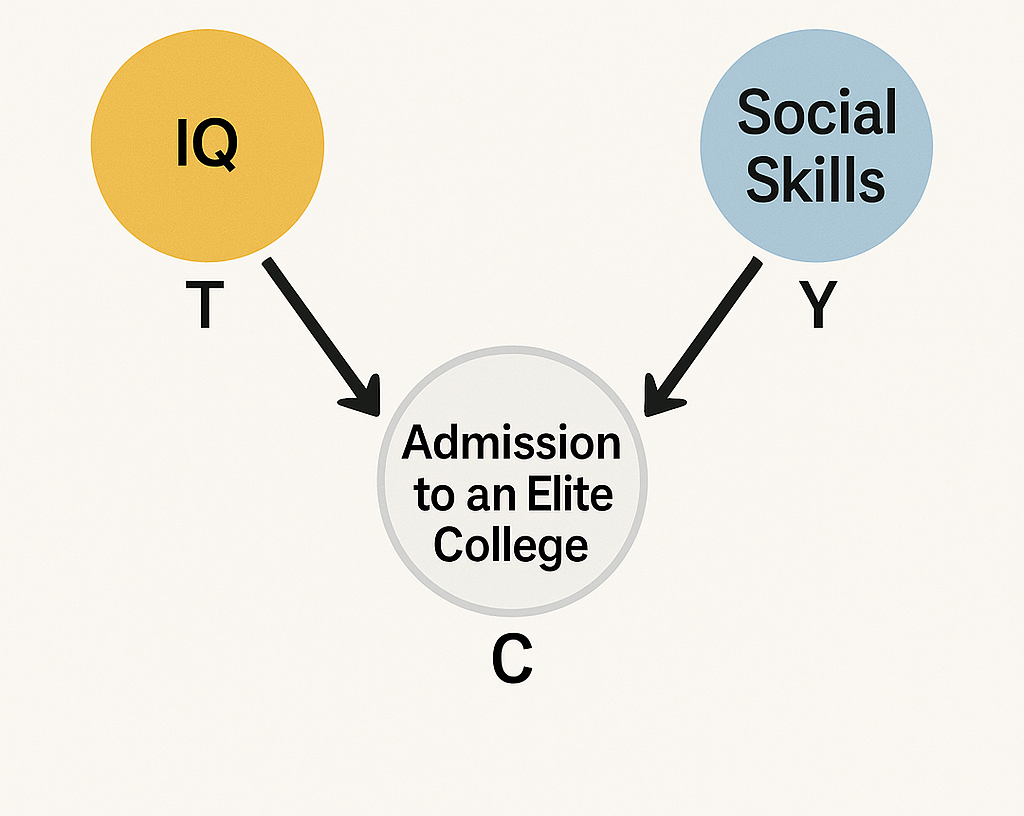

A collider is a variable that is influenced by two other variables.

Controlling for a collider (e.g., including it in a model or stratifying by it) can introduce bias, rather than eliminate it. This is called collider bias.

Real-World Example: Elite College Admissions:

Suppose you're studying:

- Does IQ (T) affect social skills (Y)?

You have a third variable:

- Admission to an elite college (C) — influenced by both IQ and social skills.

In DAG

- People IQ will effect Admission to an elite college<br>
T → C
- People  social skills will effect Admission to an elite college<br>
Y →C
- We could find out <br>
T→C←Y

Now here’s the twist:

If you only look at students who were admitted, you might find:

Among admitted students, those with higher IQ tend to have lower social skills.

This is a false correlation — an artifact of conditioning on a collider.


Even though IQ and social skills are unrelated in the general population, they appear negatively correlated within the group of admitted students — because you're conditioning on C, the collider.



## Backdoor criterion

In causal inference, the **backdoor criterion** is a graphical condition used to identify a set of variables that can be conditioned on to estimate the causal effect of a treatment variable `X` on an outcome variable `Y`. The idea is to block all **backdoor paths** — paths from `X` to `Y` that go backward into `X` (i.e., through common causes).

Formally, a set of variables `Z` satisfies the backdoor criterion relative to an ordered pair of variables `(X, Y)` in a directed acyclic graph (DAG) if:

1. No node in `Z` is a descendant of `X`, and  
2. `Z` blocks every path between `X` and `Y` that contains an arrow into `X`.

If such a set `Z` exists, then the causal effect of `X` on `Y` can be identified by adjusting for `Z` using the following formula:


## Real word Example

# Causal Inference Analysis with DoWhy

This notebook demonstrates a causal inference workflow using **DoWhy**.  
We will:

1. Load and explore the dataset.  
2. Specify a causal graph (DAG).  
3. Identify the causal effect of `treatment` on `outcome`.  
4. Estimate that effect using an appropriate estimator.  
5. Perform refutation tests to assess robustness.


In [2]:
!pip install dowhy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.4/398.4 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.6/192.6 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 36.0 MB/s eta 0:00:00
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.12
    Uninstalling Cython-3.0.12:
      Successfully uninstalled Cython-3.0.12


## 1. Load the Dataset

In [4]:
# --- Install required libraries (if needed) ---
# !pip install dowhy matplotlib pandas numpy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# For causal inference
import dowhy
from dowhy import CausalModel
# Update the path if necessary:
data_path = 'Islander_data.csv'

# Read the CSV file
df = pd.read_csv(data_path)

# Peek at the first few rows
df.head()



first_name last_name  age Happy_Sad_group  Dosage Drug  Mem_Score_Before  \
0    Bastian  Carrasco   25               H       1    A              63.5   
1       Evan  Carrasco   52               S       1    A              41.6   
2  Florencia  Carrasco   29               H       1    A              59.7   
3      Holly  Carrasco   50               S       1    A              51.7   
4     Justin  Carrasco   52               H       1    A              47.0   

   Mem_Score_After  Diff  
0             61.2  -2.3  
1             40.7  -0.9  
2             55.1  -4.6  
3             51.2  -0.5  
4             47.1   0.1

## Data Dictionary

Below is a description of each column in the dataset.


- first_name: Participant’s first name.  
- last_name: Participant’s last name.  
- age: Participant’s age in years.  
- Happy_Sad_group: Indicates the emotional state group the participant is assigned to (e.g., “happy” or “sad”).  
- Dosage: Amount of the drug administered.  
- Drug: Name or identifier of the administered drug.  
- Mem_Score_Before: Measured memory score before receiving the intervention/test.  
- Mem_Score_After: Measured memory score after receiving the intervention/test.  
Diff: The calculated difference between the memory scores (e.g., `Mem_Score_After - Mem_Score_Before`).





In [8]:
### Basic Data Checks
df.isnull().sum()
df.describe()


age      Dosage  Mem_Score_Before  Mem_Score_After        Diff
count  198.000000  198.000000        198.000000       198.000000  198.000000
mean    39.530303    1.989899         57.967677        60.922222    2.954545
std     12.023099    0.818504         15.766007        18.133851   10.754603
min     24.000000    1.000000         27.200000        27.100000  -40.400000
25%     30.000000    1.000000         46.525000        47.175000   -3.175000
50%     37.000000    2.000000         54.800000        56.750000    1.700000
75%     48.000000    3.000000         68.400000        73.250000    5.925000
max     83.000000    3.000000        110.000000       120.000000   49.000000

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   first_name        198 non-null    object 
 1   last_name         198 non-null    object 
 2   age               198 non-null    int64  
 3   Happy_Sad_group   198 non-null    object 
 4   Dosage            198 non-null    int64  
 5   Drug              198 non-null    object 
 6   Mem_Score_Before  198 non-null    float64
 7   Mem_Score_After   198 non-null    float64
 8   Diff              198 non-null    float64
dtypes: float64(3), int64(2), object(4)
memory usage: 14.1+ KB


I want to find out does different Drugs realy effect the Mem_Score

So now we have the
- Treatment: Drug (e.g., which drug the participant received).
- Outcome: Diff (the change in memory score).
- Potential Confounders: age, Happy_Sad_group, Dosage.

For illustration, we’ll assume:
- age could affect which drug is prescribed (some drugs might be favored for older vs. younger participants) and also influence memory improvement.

- Happy_Sad_group (the emotional state) might impact both the treatment assignment or compliance (some states might prefer a certain drug) and the memory outcome.

- Dosage might differ by drug type or participant characteristics and also affect the memory outcome directly.



### Deal with outlier
We anylize using IQR and found total 20 outerliers

Bottom boarder: -16.825. Top boarder: 19.575


<Axes: ylabel='Mem_Score_After'>

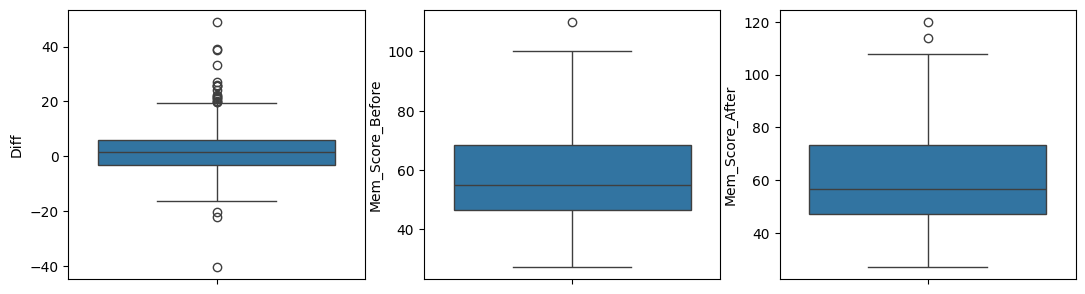

In [20]:
# searching for outliers
import seaborn as sns
IQR = df.Diff.quantile(.75) - df.Diff.quantile(.25)
low_outlier = df.Diff.quantile(.25) - 1.5 * IQR
high_outlier = df.Diff.quantile(.75) + 1.5 * IQR
print(f'Bottom boarder: {low_outlier}. Top boarder: {high_outlier}')
fig, ax = plt.subplots(1,3, figsize=(13,3.5))
sns.boxplot(ax=ax[0], y=df.Diff)
sns.boxplot(ax=ax[1], y=df.Mem_Score_Before)
sns.boxplot(ax=ax[2], y=df.Mem_Score_After)

## Useing DAG to find out weather there is effect to the change in memory score
### Drag A
we compare the effect of Drag A the memory score to other Drag B and Creat the DAG to it

isDrugA
0    131
1     67
Name: count, dtype: int64


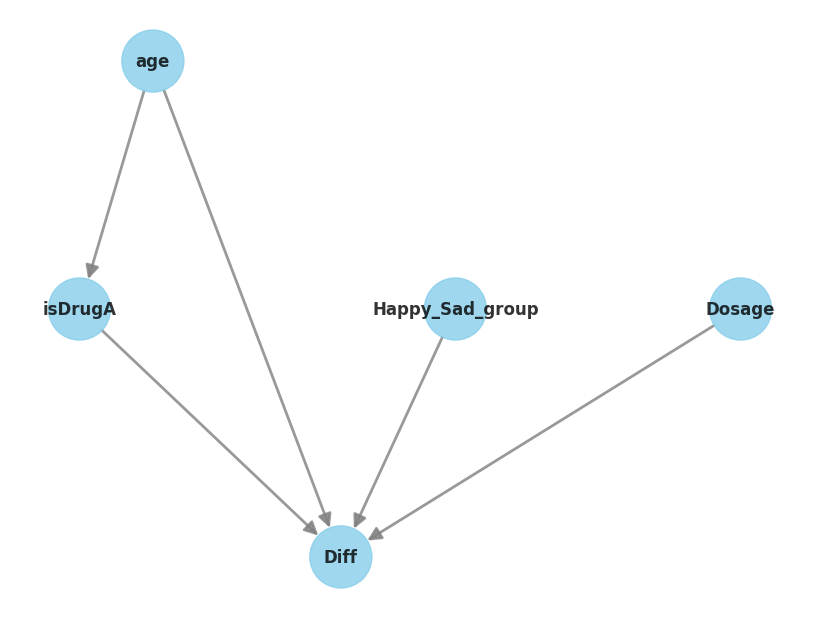

In [45]:
df['isDrugA'] = df['Drug'].apply(lambda x: 1 if x == 'A' else 0)

# (Optional) Check distribution
print(df['isDrugA'].value_counts())
causal_graph = """
graph[directed 1
    node[ id "age" label "age"]
    node[ id "Happy_Sad_group" label "Happy_Sad_group"]
    node[ id "Dosage" label "Dosage"]
    node[ id "isDrugA" label "isDrugA"]
    node[ id "Diff" label "Diff"]

    edge[ source "age" target "Diff" ]
    edge[ source "Happy_Sad_group" target "Diff" ]
    edge[ source "age" target "isDrugA" ]
    edge[ source "Dosage" target "Diff" ]
    edge[ source "isDrugA" target "Diff" ]
]
"""
model = CausalModel(
    data=df,
    treatment='isDrugA',  # Our new binary treatment
    outcome='Diff',       # The change in memory score
    graph=causal_graph
)

# Visualize the DAG (requires graphviz to be installed)
model.view_model(layout="dot")


In [46]:
identified_estimand = model.identify_effect()
print("Identified Estimand:")
print(identified_estimand)


Identified Estimand:
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                  
──────────(E[Diff|age])
d[isDrugA]             
Estimand assumption 1, Unconfoundedness: If U→{isDrugA} and U→Diff then P(Diff|isDrugA,age,U) = P(Diff|isDrugA,age)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In this cell we Are trying to find the backdoor iv and frontdoor in the DAG

In [47]:
estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.propensity_score_matching"
)

print("Estimated Effect (Drug A vs. Others) on Mem_Score Diff:", estimate.value)


Estimated Effect (Drug A vs. Others) on Mem_Score Diff: 8.401515151515152


Becouse we only find the Backdoor we using the  method "backdoor.propensity_score_matching"



In [17]:
refute_placebo = model.refute_estimate(
    identified_estimand,
    estimate,
    method_name="placebo_treatment_refuter"
)
print(refute_placebo)



Refute: Use a Placebo Treatment
Estimated effect:8.401515151515152
New effect:0.03542424242424244
p value:0.98

Refute: Add a random common cause
Estimated effect:8.401515151515152
New effect:8.401515151515154
p value:1.0



In all we found that the P value is nearly 1 we are reject our assumpition the Drug A don't have effect on the memory score change

## Drag B
### We D the same process to Drag B

isDrugB
0    133
1     65
Name: count, dtype: int64


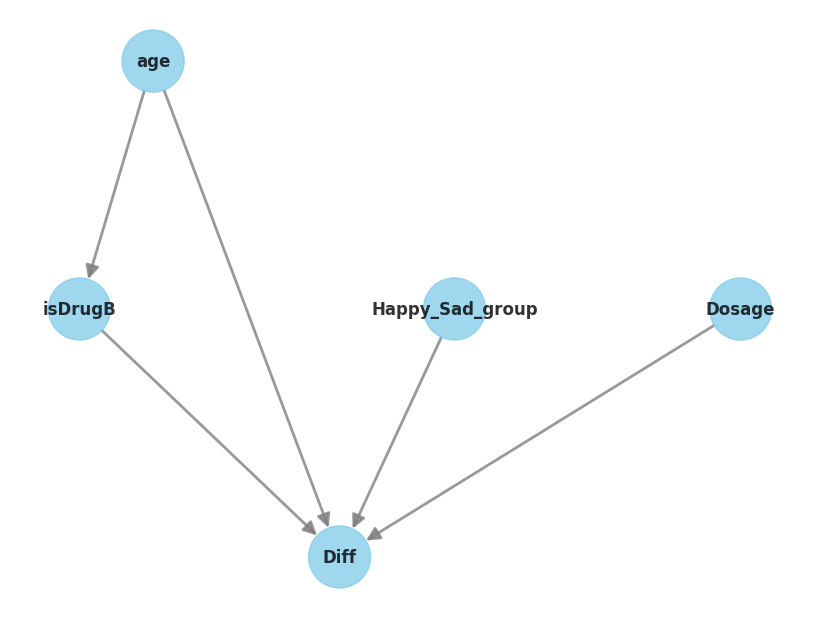

In [53]:
df['isDrugB'] = df['Drug'].apply(lambda x: 1 if x == 'T' else 0)

# (Optional) Check distribution
print(df['isDrugB'].value_counts())
causal_graph = """
graph[directed 1
    node[ id "age" label "age"]
    node[ id "Happy_Sad_group" label "Happy_Sad_group"]
    node[ id "Dosage" label "Dosage"]
    node[ id "isDrugB" label "isDrugB"]
    node[ id "Diff" label "Diff"]

    edge[ source "age" target "Diff" ]
    edge[ source "Happy_Sad_group" target "Diff" ]
    edge[ source "age" target "isDrugB" ]
    edge[ source "Dosage" target "Diff" ]
    edge[ source "isDrugB" target "Diff" ]
]
"""
model = CausalModel(
    data=df,
    treatment='isDrugB',  # Our new binary treatment
    outcome='Diff',       # The change in memory score
    graph=causal_graph
)

# Visualize the DAG (requires graphviz to be installed)
model.view_model(layout="dot")


In [54]:
identified_estimand = model.identify_effect()
print("Identified Estimand:")
print(identified_estimand)


Identified Estimand:
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                  
──────────(E[Diff|age])
d[isDrugB]             
Estimand assumption 1, Unconfoundedness: If U→{isDrugB} and U→Diff then P(Diff|isDrugB,age,U) = P(Diff|isDrugB,age)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [55]:
estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.propensity_score_matching"
)

print("Estimated Effect (Drug A vs. Others) on Mem_Score Diff:", estimate.value)

Estimated Effect (Drug A vs. Others) on Mem_Score Diff: -3.402020202020202


In [56]:
refute_placebo = model.refute_estimate(
    identified_estimand,
    estimate,
    method_name="placebo_treatment_refuter"
)
print(refute_placebo)

refute_random = model.refute_estimate(
    identified_estimand,
    estimate,
    method_name="random_common_cause"
)
print(refute_random)

Refute: Use a Placebo Treatment
Estimated effect:-3.402020202020202
New effect:0.26771212121212123
p value:0.94

Refute: Add a random common cause
Estimated effect:-3.402020202020202
New effect:-3.4020202020202026
p value:1.0



In all we found that the P value is nearly 1 we are reject our assumpition the Drug B don't have effect on the memory score change than others


## Example 2
## Causal Inference Analysis of Car accident


We want to investigate the *causal* relationship between Weather_Conditions to the influence of the Accident_Severity

The goal is to use DoWhy to formalize our assumptions, identify a causal effect, estimate it, and then perform robustness checks (refutations).

In [64]:
dataset = pd.read_csv('accident data.csv')
dataset.head()

Index Accident_Severity Accident Date   Latitude  \
0  200701BS64157           Serious    05-06-2019  51.506187   
1  200701BS65737           Serious    02-07-2019  51.495029   
2  200701BS66127           Serious    26-08-2019  51.517715   
3  200701BS66128           Serious    16-08-2019  51.495478   
4  200701BS66837            Slight    03-09-2019  51.488576   

              Light_Conditions           District Area  Longitude  \
0        Darkness - lights lit  Kensington and Chelsea  -0.209082   
1                     Daylight  Kensington and Chelsea  -0.173647   
2  Darkness - lighting unknown  Kensington and Chelsea  -0.210215   
3                     Daylight  Kensington and Chelsea  -0.202731   
4        Darkness - lights lit  Kensington and Chelsea  -0.192487   

   Number_of_Casualties  Number_of_Vehicles Road_Surface_Conditions  \
0                     1                   2                     Dry   
1                     1                   2             Wet or damp   
2                     1                   3                     Dry   
3                     1                   4                     Dry   
4                     1                   2                     Dry   

            Road_Type Urban_or_Rural_Area     Weather_Conditions  \
0  Single carriageway               Urban     Fine no high winds   
1  Single carriageway               Urban  Raining no high winds   
2                 NaN               Urban                    NaN   
3  Single carriageway               Urban     Fine no high winds   
4                 NaN               Urban                    NaN   

                           Vehicle_Type  
0                                   Car  
1                                   Car  
2                 Taxi/Private hire car  
3  Bus or coach (17 or more pass seats)  
4                         Other vehicle

## 2. Data Loading and Exploration

Let's check the basic properties of the dataset: shape, missing values, and descriptive statistics.

In [65]:
print("Shape of DataFrame:", dataset.shape)
print("\nMissing Values:\n", dataset.isnull().sum())

dataset.describe(include='all')

Shape of DataFrame: (660679, 14)

Missing Values:
 Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64


Index Accident_Severity Accident Date       Latitude  \
count     660679            660679        660679  660654.000000   
unique    421020                 3          1461            NaN   
top     2.01E+12            Slight    30-11-2019            NaN   
freq      239478            563801           704            NaN   
mean         NaN               NaN           NaN      52.553866   
std          NaN               NaN           NaN       1.406922   
min          NaN               NaN           NaN      49.914430   
25%          NaN               NaN           NaN      51.490690   
50%          NaN               NaN           NaN      52.315641   
75%          NaN               NaN           NaN      53.453452   
max          NaN               NaN           NaN      60.757544   

       Light_Conditions District Area      Longitude  Number_of_Casualties  \
count            660679        660679  660653.000000         660679.000000   
unique                5           422            NaN                   NaN   
top            Daylight    Birmingham            NaN                   NaN   
freq             484880         13491            NaN                   NaN   
mean                NaN           NaN      -1.431210              1.357040   
std                 NaN           NaN       1.383330              0.824847   
min                 NaN           NaN      -7.516225              1.000000   
25%                 NaN           NaN      -2.332291              1.000000   
50%                 NaN           NaN      -1.411667              1.000000   
75%                 NaN           NaN      -0.232869              1.000000   
max                 NaN           NaN       1.762010             68.000000   

        Number_of_Vehicles Road_Surface_Conditions           Road_Type  \
count        660679.000000                  659953              656159   
unique                 NaN                       5                   5   
top                    NaN                     Dry  Single carriageway   
freq                   NaN                  447821              492143   
mean              1.831255                     NaN                 NaN   
std               0.715269                     NaN                 NaN   
min               1.000000                     NaN                 NaN   
25%               1.000000                     NaN                 NaN   
50%               2.000000                     NaN                 NaN   
75%               2.000000                     NaN                 NaN   
max              32.000000                     NaN                 NaN   

       Urban_or_Rural_Area  Weather_Conditions Vehicle_Type  
count               660664              646551       660679  
unique                   3                   8           16  
top                  Urban  Fine no high winds          Car  
freq                421663              520885       497992  
mean                   NaN                 NaN          NaN  
std                    NaN                 NaN          NaN  
min                    NaN                 NaN          NaN  
25%                    NaN                 NaN          NaN  
50%                    NaN                 NaN          NaN  
75%                    NaN                 NaN          NaN  
max                    NaN                 NaN          NaN

For we want to analize the causual relationship between Weather_Conditions to the influence of the Accident_Severity so we will ignore the missing Weather_Conditions

For the other are not the majority of the dataset we will just using fillna

In [74]:

df_clean = dataset.dropna(subset=['Weather_Conditions'])

# Road_Surface_Conditions
df_clean['Road_Surface_Conditions'].fillna(df_clean['Road_Surface_Conditions'].mode()[0], inplace=True)

# Road_Type
df_clean['Road_Type'].fillna(df_clean['Road_Type'].mode()[0], inplace=True)

#  Urban_or_Rural_Area
df_clean['Urban_or_Rural_Area'].fillna(df_clean['Urban_or_Rural_Area'].mode()[0], inplace=True)
print("\nMissing Values:\n", df_clean.isnull().sum())



<ipython-input-74-474dda8a3193>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Road_Surface_Conditions'].fillna(df_clean['Road_Surface_Conditions'].mode()[0], inplace=True)
<ipython-input-74-474dda8a3193>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Road_Surface_Conditions'].fillna(df_clean['Road_Surface_Conditions'].


Missing Values:
 Index                       0
Accident_Severity           0
Accident Date               0
Latitude                   24
Light_Conditions            0
District Area               0
Longitude                  25
Number_of_Casualties        0
Number_of_Vehicles          0
Road_Surface_Conditions     0
Road_Type                   0
Urban_or_Rural_Area         0
Weather_Conditions          0
Vehicle_Type                0
dtype: int64


In [112]:
severity_map = {'Slight': 0, 'Serious': 1, 'Fatal': 2}
df_clean['Severity_Code'] = df_clean['Accident_Severity'].map(severity_map)
df_clean['Weather_Conditions'] = df_clean['Weather_Conditions'].astype('category')
df_clean['Light_Conditions'] = df_clean['Light_Conditions'].astype('category')
df_clean['Is_Not_Dry'] = df_clean['Road_Surface_Conditions'].apply(
    lambda x: 0 if x == 'Dry' else 1
)
df_clean['Urban_or_Rural_Area'] = df_clean['Urban_or_Rural_Area'].astype('category')
df_clean['Road_Type'] = df_clean['Road_Type'].astype('category')

<ipython-input-112-2b692f467c58>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Severity_Code'] = df_clean['Accident_Severity'].map(severity_map)
<ipython-input-112-2b692f467c58>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Weather_Conditions'] = df_clean['Weather_Conditions'].astype('category')
<ipython-input-112-2b692f467c58>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

We assuame the DAG for it

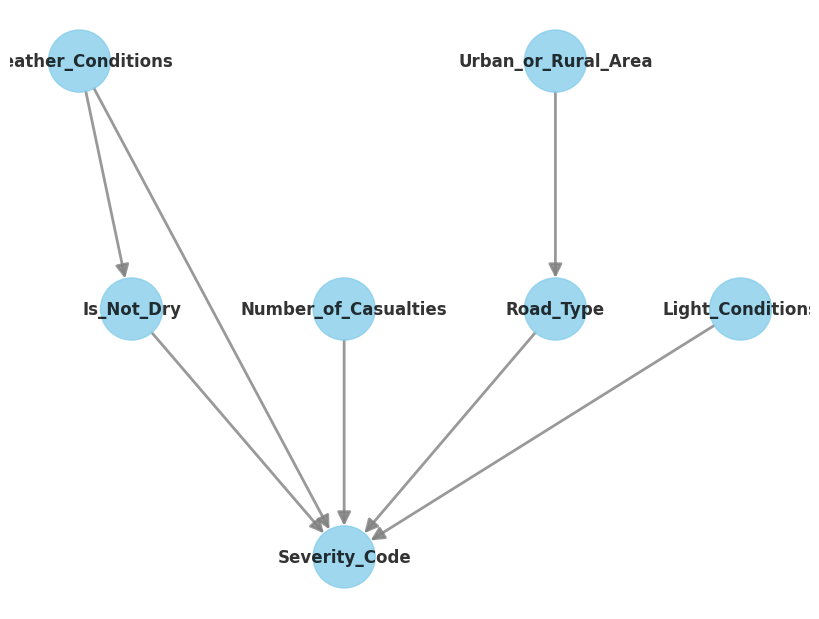

In [113]:
causal_graph = """
graph[directed 1
    node[ id "Severity_Code" label "Severity_Code"]
    node[ id "Weather_Conditions" label "Weather_Conditions"]
    node[ id "Is_Not_Dry" label "Is_Not_Dry"]
    node[ id "Urban_or_Rural_Area" label "Urban_or_Rural_Area"]
    node[ id "Number_of_Casualties" label "Number_of_Casualties"]
    node[ id "Road_Type" label "Road_Type"]
    node[ id "Light_Conditions" label "Light_Conditions"]

    edge[ source "Number_of_Casualties" target "Severity_Code" ]
    edge[ source "Weather_Conditions" target "Severity_Code" ]
    edge[ source "Is_Not_Dry" target "Severity_Code" ]
    edge[ source "Weather_Conditions" target "Is_Not_Dry" ]
    edge[ source "Road_Type" target "Severity_Code" ]
    edge[ source "Urban_or_Rural_Area" target "Road_Type" ]
    edge[ source "Light_Conditions" target "Severity_Code" ]
]
"""
model = CausalModel(
    data=df_clean,
    treatment='Is_Not_Dry',  # Our new binary treatment
    outcome='Severity_Code',       # The change in memory score
    graph=causal_graph
)

# Visualize the DAG (requires graphviz to be installed)
model.view_model(layout="dot")

In [115]:
identified_estimand = model.identify_effect(
    proceed_when_unidentifiable=True
)
print("Identified estimand: ", identified_estimand)

estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.propensity_score_stratification"
)
print("Causal Estimate: ", estimate.value)
refute_placebo = model.refute_estimate(
    identified_estimand,
    estimate,
    method_name="placebo_treatment_refuter"
)



Identified estimand:  Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                           
─────────────(E[Severity_Code|Weather_Conditions])
d[Is_Not_Dry]                                     
Estimand assumption 1, Unconfoundedness: If U→{Is_Not_Dry} and U→Severity_Code then P(Severity_Code|Is_Not_Dry,Weather_Conditions,U) = P(Severity_Code|Is_Not_Dry,Weather_Conditions)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



/usr/local/lib/python3.11/dist-packages/dowhy/causal_estimators/propensity_score_stratification_estimator.py:231: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["strata"] = ((data[self.propensity_score_column].rank(ascending=True) / num_rows) * num_strata).round(0)
/usr/local/lib/python3.11/dist-packages/dowhy/causal_estimators/propensity_score_stratification_estimator.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["dbar"] = 1 - data[self._target_estimand.treatment_variable[0]]  # 1-Treatmen

Causal Estimate:  -0.0032207119210923858


The Causal Estimate:  -0.0032207119210923858 is very low so it has very less influenc with the treatment and the outcome

## Conclusion

In this notebook, we took our first steps into the fascinating world of **causal inference** — the science of understanding how and why things happen. We explored what it means to ask a *causal question*, how to represent causal relationships using **Directed Acyclic Graphs (DAGs)**, and how to distinguish causation from correlation.

Through visual examples and foundational concepts, we learned about:

- The importance of **confounding variables** and how they can bias our conclusions.
- How to **control** for these confounders using proper adjustment techniques.
- The value of causal graphs in **designing strategies** for identifying valid causal effects.

By grounding our reasoning in causal structure rather than mere statistical associations, we empower ourselves to make better decisions, build more robust models, and ask smarter questions — whether in science, medicine, policy, or everyday life.



## Reference
Memory Test on Drugged Islanders Data https://www.kaggle.com/datasets/steveahn/memory-test-on-drugged-islanders-data/data

McNemar’s Test example https://jameshoward.us/2024/12/17/mcnemars-test-the-hidden-gem-for-paired-binary-data

Road Accident Casualties datasethttps://www.kaggle.com/code/lucasdataartist/eda-road-accident-casualties/notebook

Dowhy example https://github.com/py-why/dowhy?tab=readme-ov-file


# MIT License
Copyright (c) 2025 Yifan Yuan

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.